# Data Viziuliation and Subsetting

- What are the chances that you are either a murderer or a victim depending on the set variables and attributes
    - What are the characteristics of murderers or victims
    - What kind of relationship is between the data
    - Identify the serial killer activity per location and year
    - Identify interasting relationships (correlation) between different variables later to be used for building a 
        decision tree and clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [2]:
data2 = pd.read_csv("Age_count_cleaned_data.csv")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421667 entries, 0 to 421666
Data columns (total 25 columns):
Unnamed: 0               421667 non-null int64
Record ID                421667 non-null int64
Agency Code              421667 non-null object
Agency Name              421667 non-null object
Agency Type              421667 non-null object
City                     421667 non-null object
State                    421667 non-null object
Year                     421667 non-null int64
Month                    421667 non-null object
Incident                 421667 non-null int64
Crime Type               421667 non-null object
Crime Solved             421667 non-null object
Victim Sex               421667 non-null object
Victim Age               421667 non-null int64
Victim Race              421667 non-null object
Victim Ethnicity         421667 non-null object
Perpetrator Sex          421667 non-null object
Perpetrator Age          421667 non-null int64
Perpetrator Race         421667

In [5]:
safe_danger = data2.groupby('State')[['Perpetrator Count', 'Victim Count']].agg(['sum','mean','std'])
safe_danger

Perpetrator Count                     Victim Count  \
                                   sum      mean       std          sum   
State                                                                     
Alabama                            562  0.068171  0.326679          390   
Alaska                             181  0.138168  0.481904          286   
Arizona                           1503  0.184236  0.578103         1038   
Arkansas                          1317  0.231459  0.647910          917   
California                       18228  0.296164  0.677950         7852   
Colorado                          1350  0.267751  0.730569          873   
Connecticut                        645  0.201060  0.603833          934   
Delaware                           350  0.407925  0.917372          110   
District of Columbia               144  0.077295  0.365591          140   
Florida                           3790  0.156153  0.587122         1930   
Georgia                           2543  0.173762  0.574332         1454   
Hawaii                             168  0.160305  0.640162          134   
Idaho                              314  0.303969  0.842519          244   
Illinois                          4505  0.286213  0.737718         1584   
Indiana                           1294  0.183990  0.550095         1217   
Iowa                               400  0.264026  0.755600          318   
Kansas                             616  0.257095  0.713025          452   
Kentucky                           909  0.183340  0.591163          644   
Louisiana                         2242  0.189262  0.594166         1349   
Maine                               64  0.083551  0.348015          176   
Maryland                          2293  0.241165  0.622499         1102   
Massachusetts                      919  0.244806  0.679341          604   
Michigan                          4969  0.289569  0.734620         2252   
Minnesota                          803  0.254436  0.688757          490   
Mississippi                        900  0.167629  0.558289          532   
Missouri                          2092  0.227317  0.615532         1242   
Montana                            136  0.247273  0.821358          114   
Nebraska                           276  0.250000  0.739385          166   
Nevada                             776  0.211156  0.644085          560   
New Hampshire                       63  0.116022  0.496650          116   
New Jersey                        2181  0.243823  0.713813         1152   
New Mexico                         633  0.203472  0.573308          398   
New York                          5422  0.233516  0.610651         3425   
North Carolina                    3592  0.237582  0.667732         1840   
North Dakota                        77  0.269231  0.763807           84   
Ohio                              2927  0.220440  0.657388         2002   
Oklahoma                          1999  0.278296  0.696961         2488   
Oregon                             691  0.206207  0.614868          515   
Pennsylvania                      3027  0.185842  0.538814         2470   
Rhodes Island                      179  0.226582  0.679635          130   
South Carolina                    4641  0.443055  0.996690         1196   
South Dakota                        66  0.164179  0.526514           69   
Tennessee                         2937  0.247953  0.676396         1243   
Texas                            10191  0.232714  0.646154         5019   
Utah                               612  0.356436  1.062132          464   
Vermont                             65  0.178571  0.543919          142   
Virginia                          3437  0.286775  0.762597         1874   
Washington                        1802  0.296772  0.829097         1208   
West Virginia                      582  0.215556  0.620314          530   
Wisconsin                         1806  0.361634  0.896942          734   
Wyoming                            112  0.1971

In [ ]:
test = data[data["Year"]==2014]
#test = test.reset_index()

#test = test.groupby("State")[["Perpetrator Count","Victim Count"]].agg([["sum",'mean','count']])
test1 = test[['Perpetrator Count', "Victim Count"]].reset_index(drop=True)
test1["Perpetrator Count"] += 1
test1["Victim Count"] += 1
test1

# Relationships
data["Perpetrator Count"] += 1
data["Victim Count"] += 1
d = data.groupby(["State","Relationship"])[["Victim Count","Perpetrator Count"]].agg(["sum",'mean','std'])
d.head(40)
# mean 2 per incident?

c = data.groupby(["State", "Year"])[["Perpetrator Count", "Victim Count"]].agg(["sum"])
#c.head(40)
c["Perpetrator Pct Change"] = c["Perpetrator Count"].pct_change().round(4)*100
c["Victim Pct Change"] = c["Victim Count"].pct_change().round(4)*100
c.head(40)

import matplotlib.pyplot as plt
cc = c.unstack(level=0)
#df.unstack(level=0).plot(kind='bar', subplots=True)
pct_perp = cc["Perpetrator Pct Change"]
year = pct_perp.reset_index(inplace=True)
year

test = data[data["Year"]==2013]
#test = test.reset_index()

#test = test.groupby("State")[["Perpetrator Count","Victim Count"]].agg([["sum",'mean','count']])
test1 = test[['Perpetrator Count', "Victim Count"]].reset_index(drop=True)
test1["Perpetrator Count"] += 1
test1["Victim Count"] += 1
test1

test1[['Perpetrator Count','Victim Count']].sum()

In [ ]:
month = data2.groupby("Month")["Incident"]

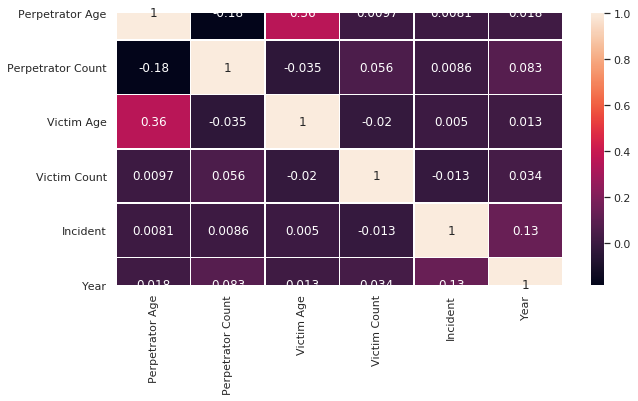

In [66]:
# must be numerical 
# annot gives us corr numbers 
# year perpetrator count
# Anova for categorical (stacked bar charts, heatmap, lojistic regression)
plt.figure(figsize = (10,5))
sns.heatmap(data2[["Perpetrator Age", "Perpetrator Count", "Victim Age","Victim Count", "Incident","Year"]].corr(), 
           annot = True, linewidth = 0.5)

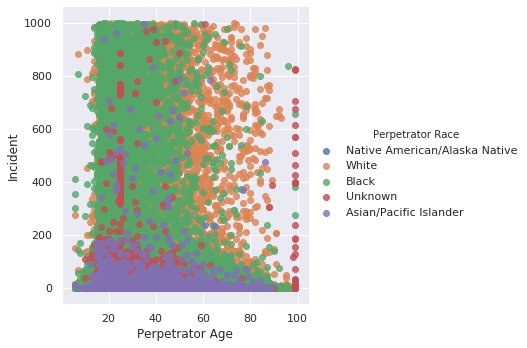

In [79]:
sns.lmplot(x='Perpetrator Age', y='Incident', data=data2, fit_reg = False, hue="Perpetrator Race")

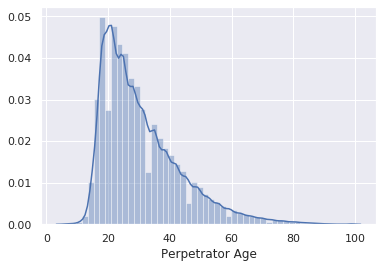

In [81]:
sns.distplot(data2["Perpetrator Age"])

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


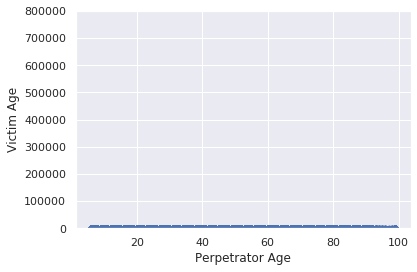

In [128]:
# for numerical relationship
#scatter plot grlivarea/saleprice
var = 'Perpetrator Age'
data = pd.concat([data2['Victim Age'], data2[var]], axis=1)
data.plot.scatter(x=var, y='Victim Age', ylim=(0,800000));

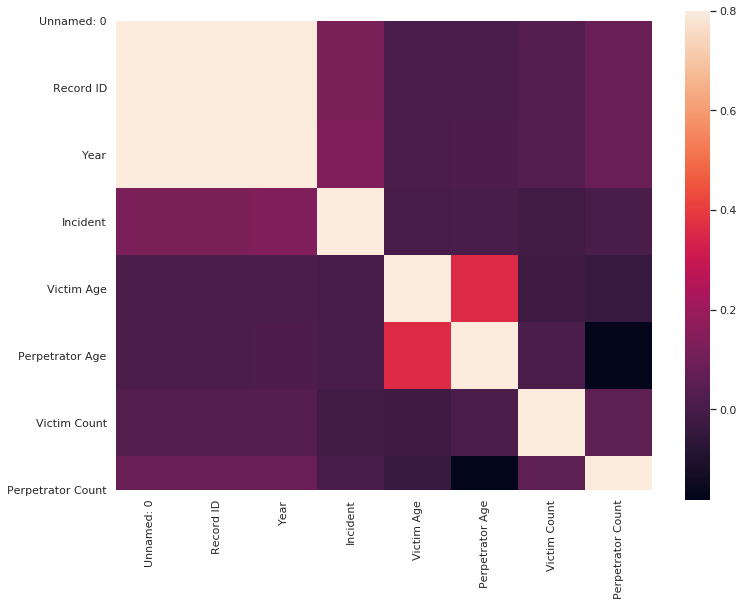

In [129]:
#correlation matrix
corrmat = data2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

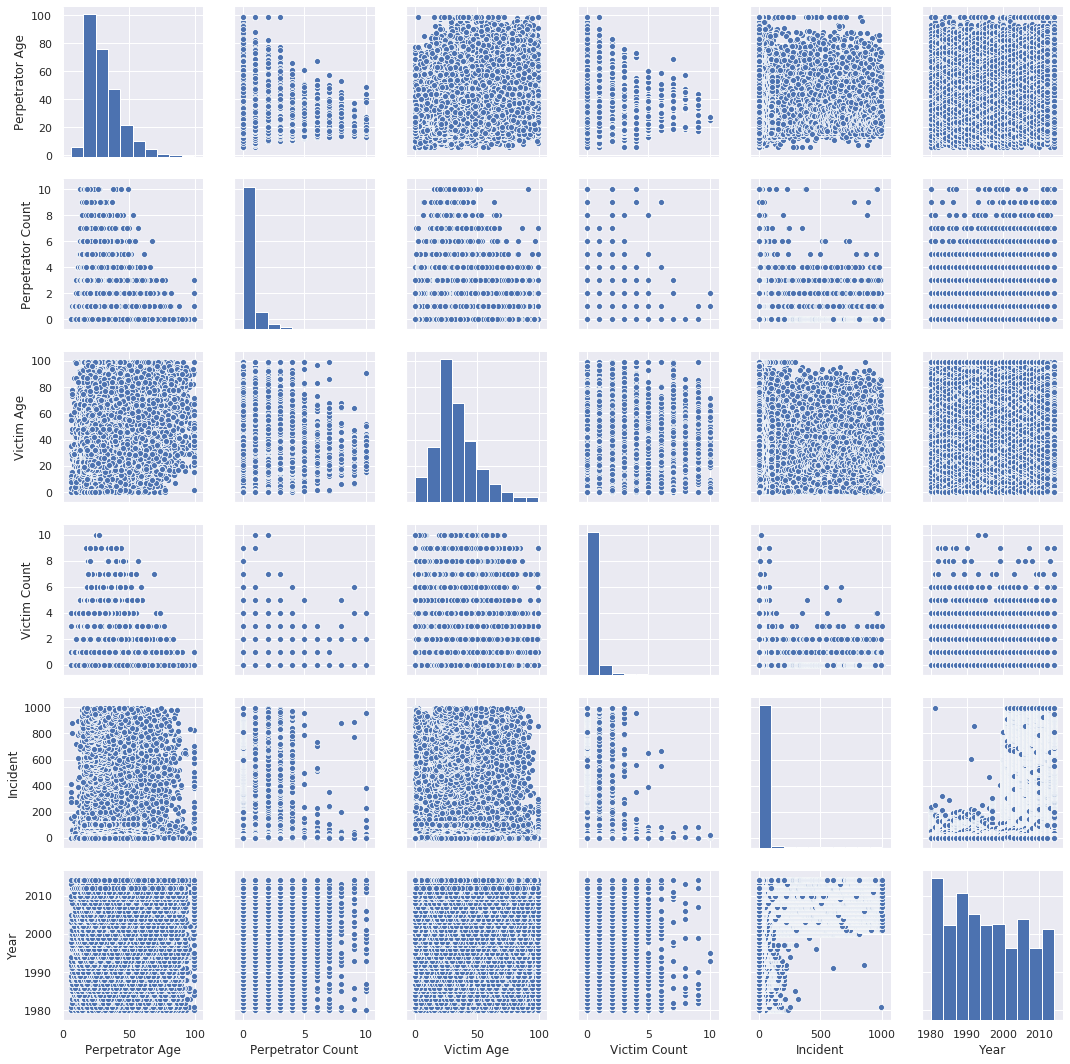

In [131]:
#scatterplot
sns.set()
cols = ['Perpetrator Age', 'Perpetrator Count', 'Victim Age', 'Victim Count', 'Incident', 'Year']
sns.pairplot(data2[cols], height = 2.5)
plt.show();

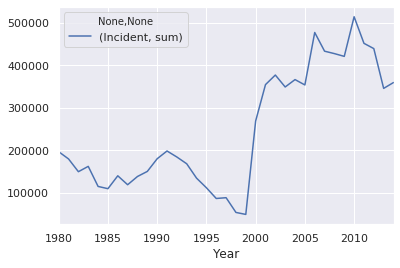

In [20]:
l = data2.groupby(["Year"])[["Incident"]].agg(["sum"])
l.plot()

In [28]:
l

,Incident
,sum
Year,
1980,197103
1981,180101
1982,150103
1983,162636
1984,115442
1985,110139
1986,140480
1987,119434


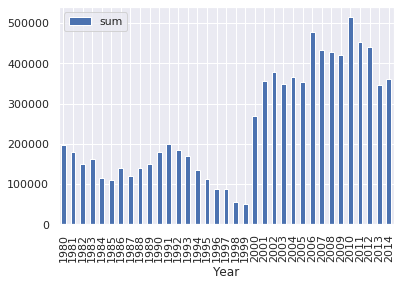

In [23]:
l["Incident"].plot(kind="bar")

In [ ]:
# deliting unreasonably high ages (setting upper limit)
d = data2["State"] == "New York"

s = data2["Incident"][d].reset_index()
s["Incident"].plot(kind="bar")

In [113]:
filtered_states = data2.groupby("State")
state_avg = filtered_states.mean()
state_count = filtered_states.count()

In [112]:
# automatically takes numbers
filtered_state = data2.groupby("State")[["Incident","Perpetrator Count"]].agg(["max","sum","std","mean"])
filtered_state

Incident                                   \
                          max      sum         std        mean   
State                                                            
Alabama                   191    24469    7.860273    2.968098   
Alaska                      7     2180    0.950338    1.664122   
Arizona                    30    35340    4.951761    4.331944   
Arkansas                   45     9632    2.657617    1.692794   
California                131   653518   18.402261   10.618194   
Colorado                  403    11460    6.060897    2.272908   
Connecticut                10     5184    1.110213    1.615960   
Delaware                   27     1135    1.048181    1.322844   
District of Columbia      304    39201   45.214459   21.041868   
Florida                   999  5234832  307.771643  215.682584   
Georgia                   111    42487    4.174827    2.903109   
Hawaii                      8     2038    1.318732    1.944656   
Idaho                       4     1081    0.228259    1.046467   
Illinois                  476   420772   23.910364   26.732656   
Indiana                    99    21705    4.480361    3.086165   
Iowa                       99     1834    2.556861    1.210561   
Kansas                     17     3901    1.292933    1.628130   
Kentucky                   44    11480    3.743561    2.315450   
Louisiana                 302    47583    6.580525    4.016799   
Maine                       3      796    0.200734    1.039164   
Maryland                  143    66639    7.560953    7.008729   
Massachusetts              25     7945    2.261727    2.116409   
Michigan                   70   161912   11.309526    9.435431   
Minnesota                  17     5985    1.772042    1.896388   
Mississippi               291     9642    4.693756    1.795865   
Missouri                  112    42598    6.254790    4.628708   
Montana                     7      586    0.351016    1.065455   
Nebraska                   36     2043    2.901267    1.850543   
Nevada                    908    16614   15.713992    4.520816   
New Hampshire              71      644    3.012340    1.186004   
New Jersey                 31    19345    2.304676    2.162661   
New Mexico                 71     6028    2.523708    1.937641   
New York                  676  1062597   57.199585   45.764116   
North Carolina             16    24433    1.407137    1.616046   
North Dakota                2      291    0.131290    1.017483   
Ohio                      994    45818    9.377953    3.450670   
Oklahoma                  201    29871   13.925661    4.158569   
Oregon                     22     5554    1.542891    1.657416   
Pennsylvania              605   147190   11.992215    9.036714   
Rhodes Island              53     1204    2.077413    1.524051   
South Carolina             99    13726    1.146265    1.310358   
South Dakota               71      515    3.523075    1.281095   
Tennessee                 130    58660    9.774069    4.952301   
Texas                     947   309933   12.644445    7.077389   
Utah                        7     2150    0.638601    1.252184   
Vermont                    10      434    0.894640    1.192308   
Virginia                   25    22823    1.833462    1.904297   
Washington                 11     9398    1.140742    1.547760   
West Virginia             854     4024   16.866746    1.490370   
Wisconsin                 704    19479   10.795085    3.900481   
Wyoming                    71      656    2.941033    1.154930   

                     Perpetrator Count                             
                                   max    sum       std      mean  
State                                                              
Alabama                             10    562  0.326679  0.068171  
Alaska                               5    181  0.481904  0.138168  
Arizona                             10   1503  0.578103  0.184236  
Arkansas                             9   1317  0

In [115]:
state_avg

,Unnamed: 0,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
State,,,,,,,,
Alabama,170915.850679,251806.423338,1992.668607,2.968098,36.615842,32.427220,0.047307,0.068171
Alaska,211857.616794,314834.109160,1996.109924,1.664122,31.830534,30.558015,0.218321,0.138168
Arizona,237594.462123,353748.525006,1998.105295,4.331944,33.329125,31.649301,0.127237,0.184236
Arkansas,205082.714938,303654.448330,1995.413181,1.692794,35.291037,31.960281,0.161160,0.231459
California,197512.095520,292116.732627,1994.699449,10.618194,31.847076,29.701821,0.127577,0.296164
Colorado,221775.744942,329668.675129,1996.674137,2.272908,32.397858,31.486513,0.173146,0.267751
Connecticut,204313.519015,302768.096945,1995.192643,1.615960,32.054863,29.814526,0.291147,0.201060
Delaware,228628.708625,341009.000000,1997.357809,1.322844,34.595571,30.419580,0.128205,0.407925
District of Columbia,202058.479334,299456.920021,1995.022008,21.041868,32.363392,28.045089,0.075148,0.077295


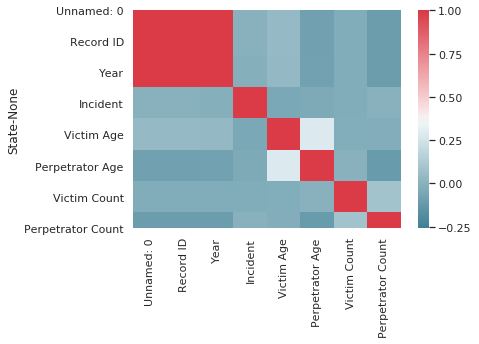

In [117]:
corr = filtered_states.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

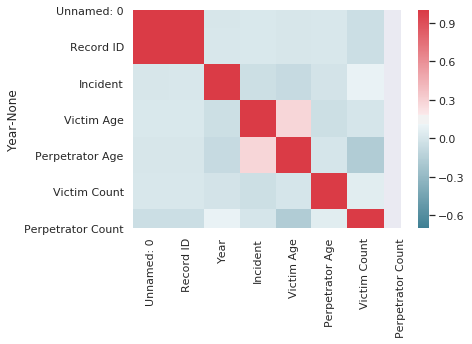

In [119]:
filtered_year = data2.groupby("Year")
corr1 = filtered_year.corr()
sns.heatmap(corr1, xticklabels=corr.columns, yticklabels=corr1.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

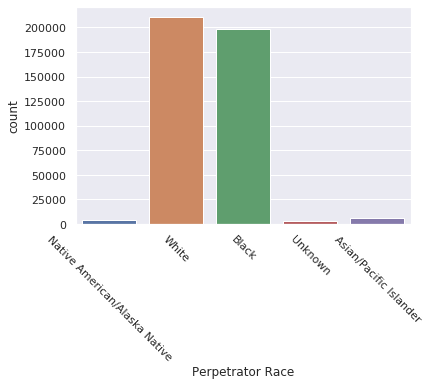

In [85]:
#Bar PlotPython

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Perpetrator Race', data=data2)
 
# Rotate x-labels
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

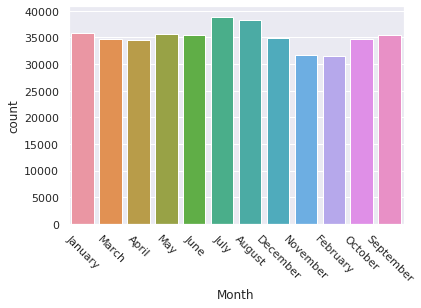

In [87]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Month', data=data2)
 
# Rotate x-labels
plt.xticks(rotation=-45)

In [ ]:
# comparison

In [ ]:
# distribution 

In [ ]:
# murders by state

In [ ]:
# murders compared to sex 

In [ ]:
# bar chart for sex --> victims and perpetrators

In [ ]:
# age we do histogram 

In [ ]:
#popular time

In [15]:
sub = data2[["Perpetrator Sex", "Victim Sex"]]
sub

,Perpetrator Sex,Victim Sex
0,Male,Male
1,Male,Male
2,Male,Male
3,Male,Male
4,Male,Female
...,...,...
421662,Male,Male
421663,Male,Male
421664,Female,Female
421665,Male,Male


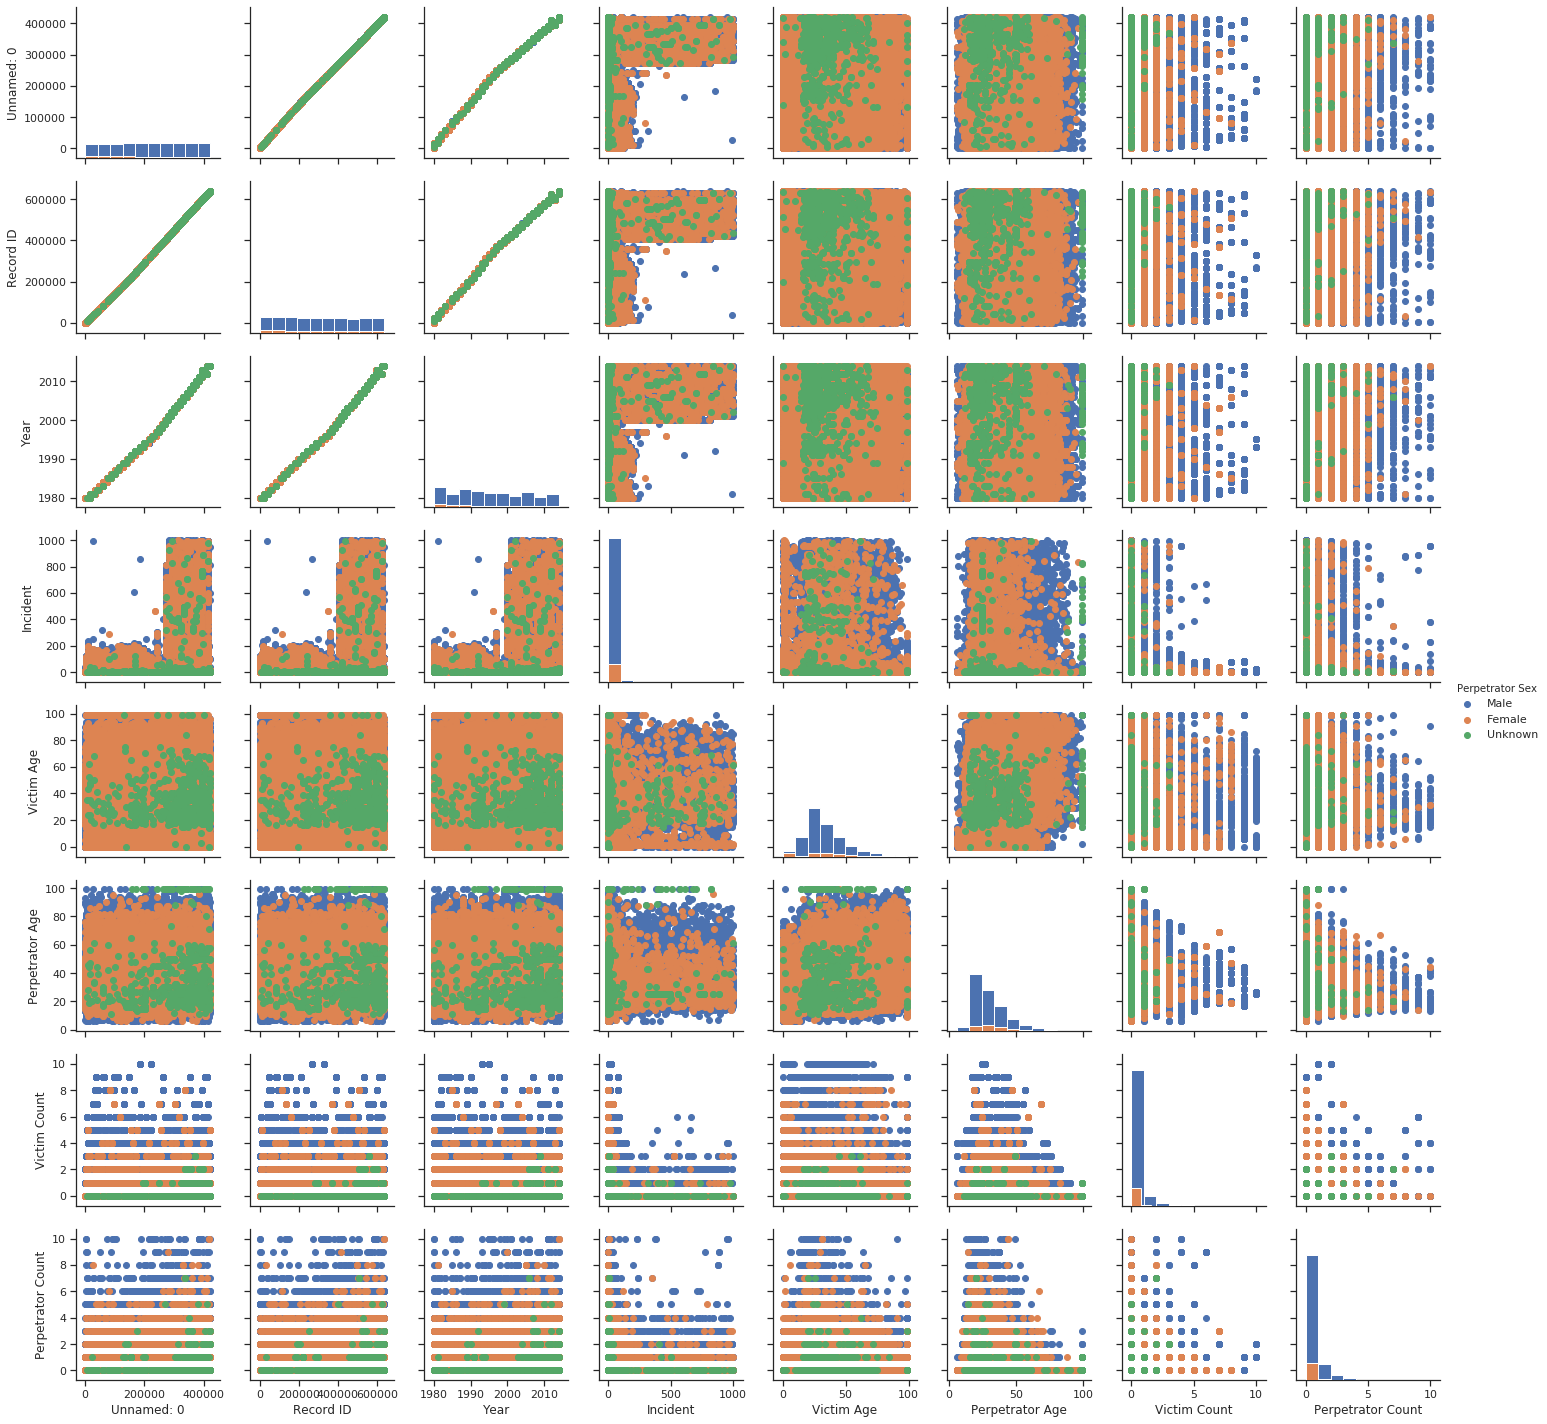

In [19]:
g = sns.PairGrid(data2, hue="Perpetrator Sex")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();